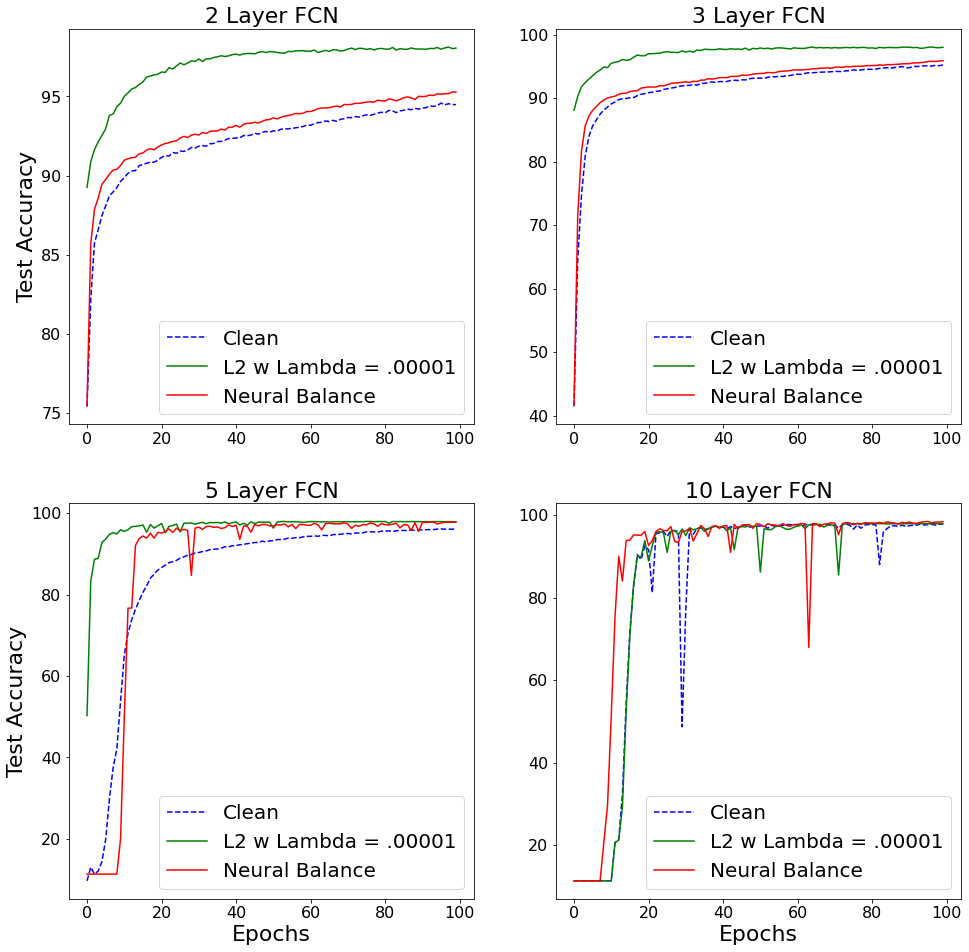

In [32]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

vals = []

for size in ['small', 'Medium', 'Large', 'XLarge']:
    l = []
    for type in ['Clean', 'L21e-5', 'NB']:
        with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/{size}MnistModel{type}Hist.pkl', 'rb') as file:
            l.append(pickle.load(file)['test_acc'])
    vals.append(l)

x_values = list(range(100))

fig, axs = plt.subplots(2, 2, figsize = (16, 16))

for i in range(4):
    for j in range(6):
        if j == 0:
            axs[i//2][i%2].plot(x_values, vals[i][j], 'blue', label="Clean", linestyle='--')
        elif j == 1:
            axs[i//2][i%2].plot(x_values, vals[i][j], 'green', label="L2 w Lambda = .00001")
        elif j == 2:
            axs[i//2][i%2].plot(x_values, vals[i][j], 'red', label="Neural Balance")
    if i == 0:
        axs[i//2][i%2].set_title("2 Layer FCN", fontsize = 22)
    elif i == 1:
        axs[i//2][i%2].set_title("3 Layer FCN", fontsize = 22)
    elif i == 2:
        axs[i//2][i%2].set_title("5 Layer FCN", fontsize = 22)
    elif i == 3:
        axs[i//2][i%2].set_title("10 Layer FCN", fontsize = 22)
    axs[i//2][i%2].legend(fontsize=20)
    axs[1][i%2].set_xlabel('Epochs', fontsize = 22)
    axs[i//2][0].set_ylabel('Test Accuracy', fontsize = 22)
    axs[i//2][i%2].tick_params(axis='y', labelsize=16)
    axs[i//2][i%2].tick_params(axis='x', labelsize=16)

plt.savefig("plots.pdf", dpi=1000)

In [16]:
from tabulate import tabulate

for size in ['small', 'Medium', 'Large', 'XLarge']:
    print("{:>15}".format(size))
    for type in ['Clean', 'L21e-5', 'L21e-4', 'L21e-3','L21e-2', 'NB']:
        with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/hist/{size}MnistModel{type}Hist.pkl', 'rb') as file:
            t = type
            m = np.max(pickle.load(file)['test_acc'])
            ft = "{:<15}".format(t)
            fm = "{:<15}".format(m)
            print(ft, fm)
    print()

          small
Clean           94.58          
L21e-5          98.12          
L21e-4          98.13          
L21e-3          98.03          
L21e-2          95.9           
NB              95.28          

         Medium
Clean           95.22          
L21e-5          98.05          
L21e-4          98.04          
L21e-3          98.12          
L21e-2          96.42          
NB              95.88          

          Large
Clean           96.15          
L21e-5          97.98          
L21e-4          98.04          
L21e-3          98.1           
L21e-2          96.92          
NB              97.85          

         XLarge
Clean           97.91          
L21e-5          97.98          
L21e-4          98.12          
L21e-3          97.87          
L21e-2          11.35          
NB              98.45          



In [24]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

over = []
for ln in ['Clean', 'NB', 'L2']:
    vals = []
    for type in ['-256-10-0_01_DS_', '-256-128-10-0_01_DS_']:
        with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MnistModel-784{type}{ln}.pkl', 'rb') as file:
            vals.append(pickle.load(file)['test_acc'])
    over.append(vals)
x_values = list(range(100))

fig, axs = plt.subplots(2, figsize = (10, 20))

for i in range(3):
    for j in range(2):
        if j == 0 and i == 0:
            axs[0].plot(x_values, over[i][j], label="Clean", linestyle='--')
        elif j == 0 and i == 1:
            axs[0].plot(x_values, over[i][j], label="NB", linestyle='--')
        if j == 1 and i == 0:
            axs[1].plot(x_values, over[i][j], label="Clean", linestyle='--')
        if j == 1 and i == 1:
            axs[1].plot(x_values, over[i][j], label="NB", linestyle='--')
        if j == 0 and i == 2:
            axs[0].plot(x_values, over[i][j], label="L2", linestyle='--')
        if j == 1 and i == 2:
            axs[1].plot(x_values, over[i][j], label="L2", linestyle='--')
axs[0].legend()
axs[1].legend()

plt.savefig("plottignsubsets.pdf", dpi=1000)

FileNotFoundError: [Errno 2] No such file or directory: '/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MnistModel-784-256-10-0_01_DS_Clean.pkl'

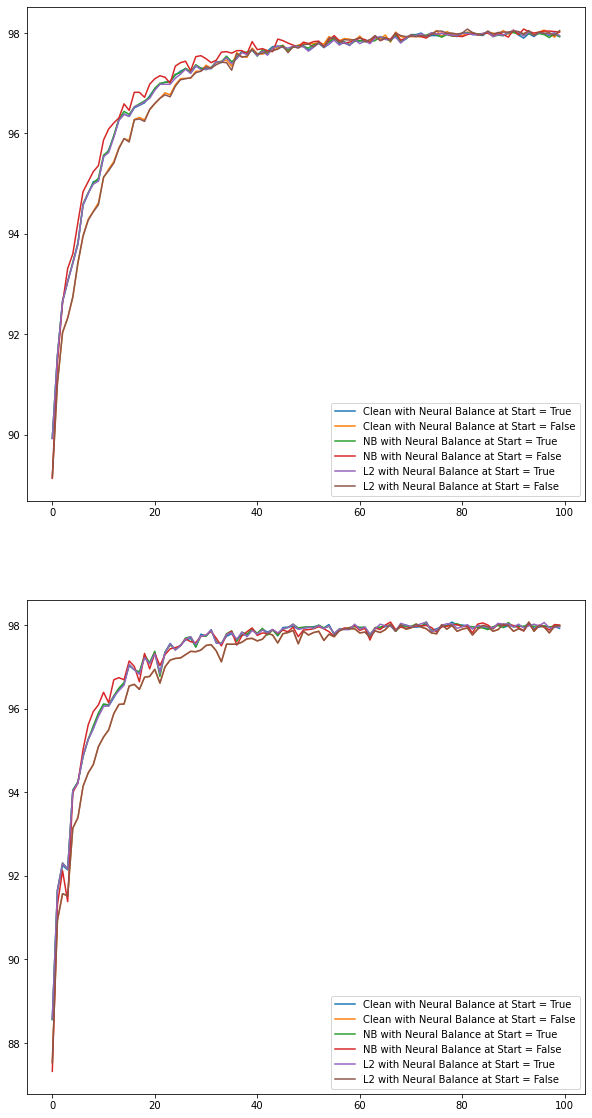

In [21]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, figsize=(10, 20))
xval = np.arange(0, 100)

for i, size in enumerate(['256', '256-128']):
    for type in ['Clean', 'NB', 'L2']:
        for NbAtStart in ['True', 'False']:
            allLists = []
            for iteration in range(1):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST_{size}_NbAtStart_{NbAtStart}_{type}_iteration_{iteration}.pkl', 'rb') as f:
                    allLists.append(pickle.load(f)['test_acc'])
            allLists = np.array(allLists)
            mean = allLists.mean(axis = 0)
            std = allLists.std(axis = 0)
            axs[i].plot(xval, mean, label = f'{type} with Neural Balance at Start = {NbAtStart}')
            axs[i].fill_between(xval, mean-std, mean+std, alpha=0.1)
    axs[i].legend()
            
                


Text(0.5, 1.0, 'Full Neural Balance At Start')

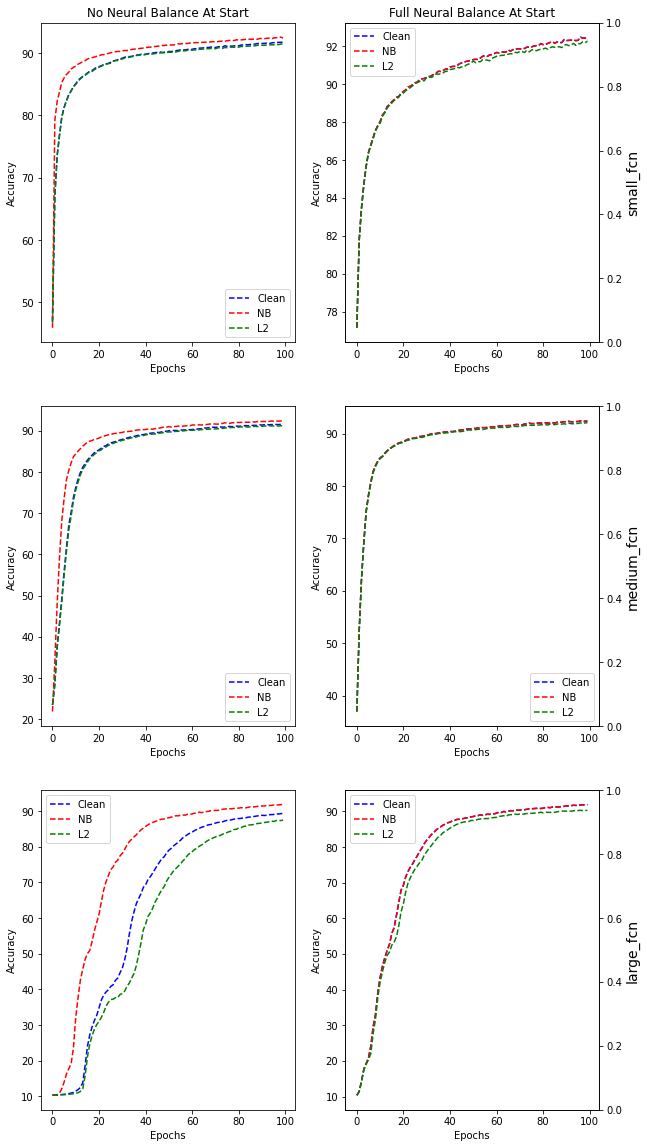

In [25]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(10, 20))
xval = np.arange(0, 100)

for i,model in enumerate(['small_fcn', 'medium_fcn', 'large_fcn']):
    for neuralBalanceAtStart in [0, 1]:
        for trainDataFrac in ['1']:
            l = []
            for seed in range(55,56):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_{neuralBalanceAtStart}-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][neuralBalanceAtStart].plot(xval, mean, 'blue', linestyle = '--', label = 'Clean')
            axs[i][neuralBalanceAtStart].fill_between(xval, mean-std, mean+std, facecolor='blue', alpha=.1)
            l = []
            for seed in range(55,56):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_1-neuralBalanceAtStart_{neuralBalanceAtStart}-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][neuralBalanceAtStart].plot(xval, mean, 'red', linestyle = '--', label = 'NB')
            axs[i][neuralBalanceAtStart].fill_between(xval, mean-std, mean+std, facecolor='red', alpha=.1)
            l = []
            for seed in range(55,56):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_{model}-l2Weight_0.01-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_{neuralBalanceAtStart}-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][neuralBalanceAtStart].plot(xval, mean, 'green', linestyle = '--', label = 'L2')
            axs[i][neuralBalanceAtStart].fill_between(xval, mean-std, mean+std, facecolor='green', alpha=.1)
        axs[i][neuralBalanceAtStart].legend()
        axs[i][neuralBalanceAtStart].set_ylabel('Accuracy')
        axs[i][neuralBalanceAtStart].set_xlabel('Epochs')

        if neuralBalanceAtStart == 1:
            taxis = axs[i][neuralBalanceAtStart].twinx()
            taxis.set_ylabel(model, fontsize=14)

axs[0][0].set_title('No Neural Balance At Start')
axs[0][1].set_title('Full Neural Balance At Start')
                


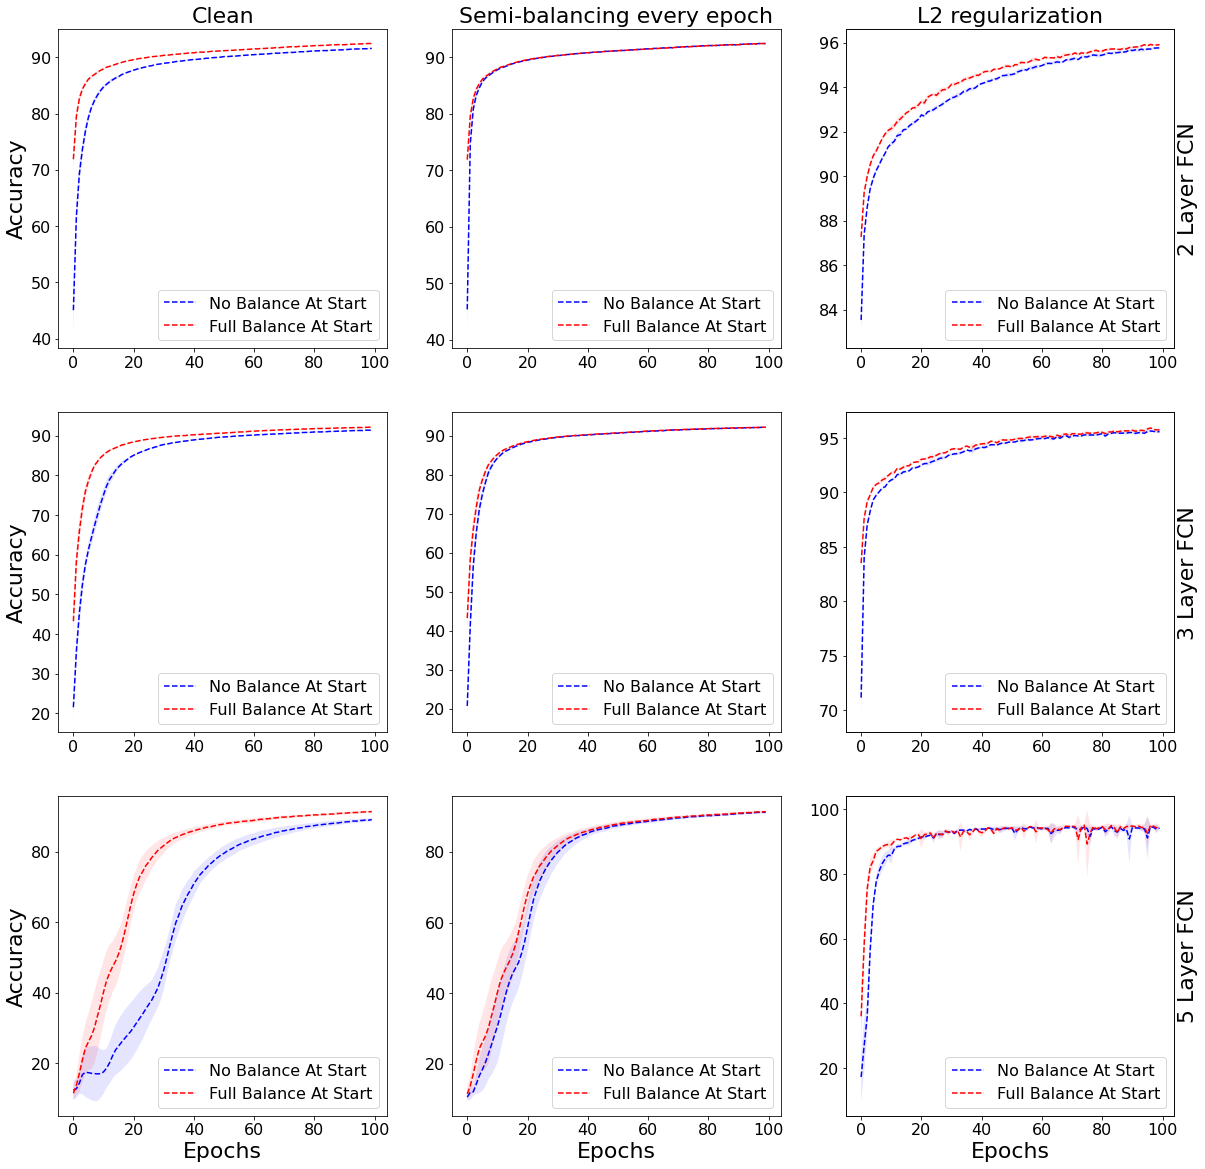

In [73]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
xval = np.arange(0, 100)
trainDataFrac=1

for i,model in enumerate(['small_fcn', 'medium_fcn', 'large_fcn']):
    for type in ['Clean', 'NB', 'L2']:
        if type == 'Clean':
            l = []
            for seed in range(1,6):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_0-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][0].plot(xval, mean, 'blue', linestyle = '--', label = 'No Balance At Start')
            axs[i][0].fill_between(xval, mean-std, mean+std, facecolor='blue', alpha=.1)
            l = []
            for seed in range(1,6):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_1-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][0].plot(xval, mean, 'red', linestyle = '--', label = 'Full Balance At Start')
            axs[i][0].fill_between(xval, mean-std, mean+std, facecolor='red', alpha=.1)
        elif type == 'NB':
            l = []
            for seed in range(1,6):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_1-neuralBalanceAtStart_0-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][1].plot(xval, mean, 'blue', linestyle = '--', label = 'No Balance At Start')
            axs[i][1].fill_between(xval, mean-std, mean+std, facecolor='blue', alpha=.1)
            l = []
            for seed in range(1,6):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_1-neuralBalanceAtStart_1-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][1].plot(xval, mean, 'red', linestyle = '--', label = 'Full Balance At Start')
            axs[i][1].fill_between(xval, mean-std, mean+std, facecolor='red', alpha=.1)
        elif type == 'L2':
            l = []
            for seed in range(1,6):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_{model}-l2Weight_0.01-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_0-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][2].plot(xval, mean, 'blue', linestyle = '--', label = 'No Balance At Start')
            axs[i][2].fill_between(xval, mean-std, mean+std, facecolor='blue', alpha=.1)
            l = []
            for seed in range(1,6):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_{model}-l2Weight_0.01-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_1-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][2].plot(xval, mean, 'red', linestyle = '--', label = 'Full Balance At Start')
            axs[i][2].fill_between(xval, mean-std, mean+std, facecolor='red', alpha=.1)
            taxis = axs[i][2].twinx()
            if model == 'small_fcn':
                taxis.set_ylabel('2 Layer FCN', fontsize=22)
            if model == 'medium_fcn':
                taxis.set_ylabel('3 Layer FCN', fontsize=22)
            if model == 'large_fcn':
                taxis.set_ylabel('5 Layer FCN', fontsize=22)
            taxis.set_yticks(np.arange(0))

    axs[i][0].legend(fontsize=16)
    axs[i][1].legend(fontsize=16)
    axs[i][2].legend(fontsize=16)
    axs[2][0].set_xlabel('Epochs', fontsize=22)
    axs[2][1].set_xlabel('Epochs', fontsize=22)
    axs[2][2].set_xlabel('Epochs', fontsize=22)
    axs[i][0].set_ylabel('Accuracy', fontsize=22)
    axs[i][0].tick_params(axis='y', labelsize=16)
    axs[i][0].tick_params(axis='x', labelsize=16)
    axs[i][1].tick_params(axis='y', labelsize=16)
    axs[i][1].tick_params(axis='x', labelsize=16)
    axs[i][2].tick_params(axis='y', labelsize=16)
    axs[i][2].tick_params(axis='x', labelsize=16)

axs[0][0].set_title('Clean', fontsize=22)
axs[0][1].set_title('Semi-balancing every epoch', fontsize=22)
axs[0][2].set_title('L2 regularization', fontsize=22)

plt.savefig('noBalanceVsFullBalance.pdf', dpi=1000)

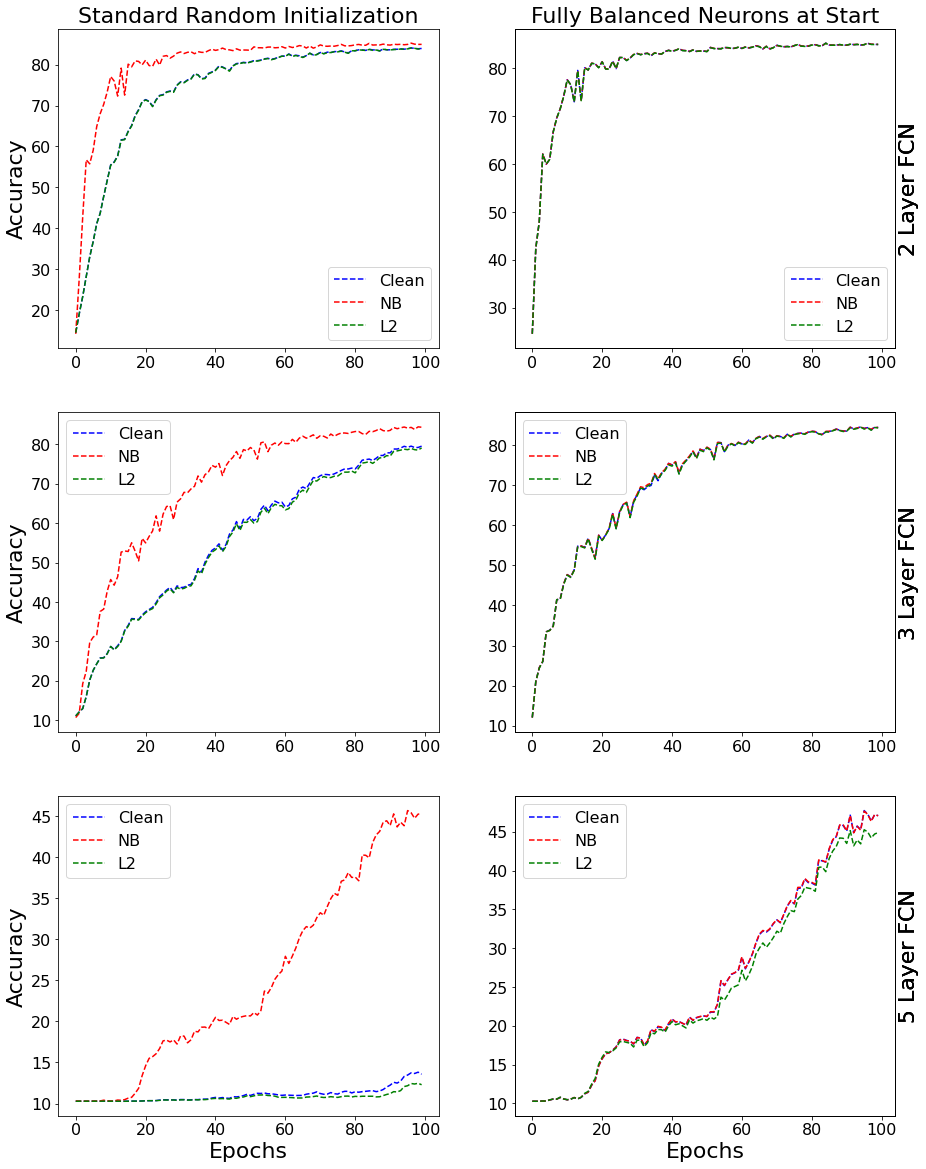

In [156]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(15, 20))
xval = np.arange(0, 100)
trainDataFrac = 0.01
l2 = 0.01

for i,model in enumerate(['small_fcn', 'medium_fcn', 'large_fcn']):
    for type in ['Clean', 'NB', 'L2']:
        if type == 'Clean':
            l = []
            for seed in range(55, 56):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_0-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][0].plot(xval, mean, 'blue', linestyle = '--', label = 'Clean')
            # axs[i][0].fill_between(xval, mean-std, mean+std, facecolor='blue', alpha=.1)
            l = []
            for seed in range(55, 56):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_1-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][1].plot(xval, mean, 'blue', linestyle = '--', label = 'Clean')
            # axs[i][0].fill_between(xval, mean-std, mean+std, facecolor='red', alpha=.1)
        elif type == 'NB':
            l = []
            for seed in range(55, 56):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_1-neuralBalanceAtStart_0-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][0].plot(xval, mean, 'red', linestyle = '--', label = 'NB')
            # axs[i][1].fill_between(xval, mean-std, mean+std, facecolor='blue', alpha=.1)
            l = []            
            for seed in range(55, 56):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_1-neuralBalanceAtStart_1-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][1].plot(xval, mean, 'red', linestyle = '--', label = 'NB')
            # axs[i][1].fill_between(xval, mean-std, mean+std, facecolor='red', alpha=.1)
        elif type == 'L2':
            l = []
            for seed in range(55, 56):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_{model}-l2Weight_{l2}-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_0-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][0].plot(xval, mean, 'green', linestyle = '--', label = 'L2')
            # axs[i][2].fill_between(xval, mean-std, mean+std, facecolor='blue', alpha=.1)
            l = []
            for seed in range(55, 56):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_{model}-l2Weight_{l2}-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_1-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][1].plot(xval, mean, 'green', linestyle = '--', label = 'L2')

        taxis = axs[i][1].twinx()
        if model == 'small_fcn':
            taxis.set_ylabel('2 Layer FCN', fontsize=22)
        if model == 'medium_fcn':
            taxis.set_ylabel('3 Layer FCN', fontsize=22)
        if model == 'large_fcn':
            taxis.set_ylabel('5 Layer FCN', fontsize=22)
        taxis.set_yticks(np.arange(0))
        
    axs[i][0].legend(fontsize=16)
    axs[i][1].legend(fontsize=16)
    axs[2][0].set_xlabel('Epochs', fontsize = 22)
    axs[2][1].set_xlabel('Epochs', fontsize = 22)
    axs[i][0].set_ylabel('Accuracy', fontsize = 22)
    axs[i][0].tick_params(axis='y', labelsize=16)
    axs[i][1].tick_params(axis='x', labelsize=16)
    axs[i][0].tick_params(axis='x', labelsize=16)
    axs[i][1].tick_params(axis='y', labelsize=16)
        

axs[0][0].set_title('Standard Random Initialization', fontsize = 22)
axs[0][1].set_title('Fully Balanced Neurons at Start', fontsize = 22)


plt.savefig('MnistFrac1e-2.pdf', dpi=1000)

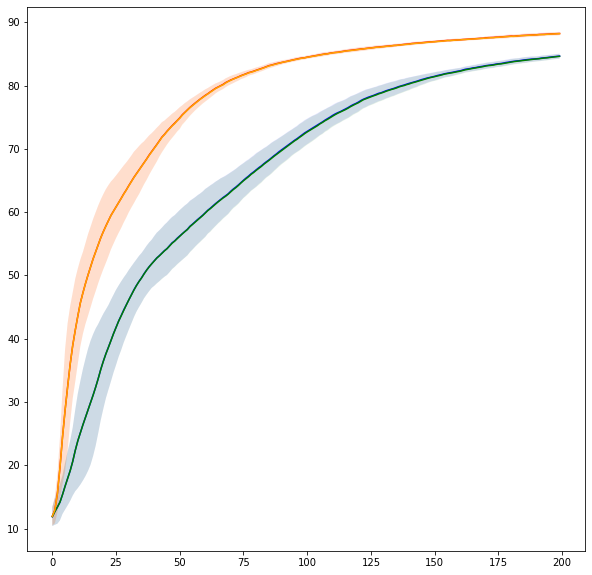

In [12]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
xval = np.arange(200)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_medium_fcn-lr_0.0001-l2Weight_0-seed_{i}-neuralBalance_0-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
    f.close()
l=np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'blue', label='Clean')
plt.fill_between(xval, mean-std, mean+std, facecolor='blue', alpha=0.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_medium_fcn-lr_0.0001-l2Weight_0-seed_{i}-neuralBalance_1-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
    f.close()
l=np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'red', label='NB')
plt.fill_between(xval, mean-std, mean+std, facecolor='red', alpha=0.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_medium_fcn-lr_0.0001-l2Weight_0.001-seed_{i}-neuralBalance_0-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
    f.close()
l=np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'green', label='L2')
plt.fill_between(xval, mean-std, mean+std, facecolor='green', alpha=0.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_medium_fcn-lr_0.0001-l2Weight_0.001-seed_{i}-neuralBalance_1-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
    f.close()
l=np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'orange', label='L2+NB')
plt.fill_between(xval, mean-std, mean+std, facecolor='orange', alpha=0.1)

In [ ]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
xval = np.arange(100)

l = []
for i in range(11, 16):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_medium_fcn-lr_0.0001-l2Weight_0-seed_{i}-neuralBalance_1-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
    f.close()
l=np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'red', label='NB')
plt.fill_between(xval, mean-std, mean+std, facecolor='red', alpha=0.1)

l = []
for i in range(11, 16):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNISTLateral-model_medium_fcn-lr_0.0001-l2Weight_0-seed_{i}-neuralBalance_1-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
    f.close()
l=np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'blue', label='NB Lateral')
plt.fill_between(xval, mean-std, mean+std, facecolor='blue', alpha=0.1)

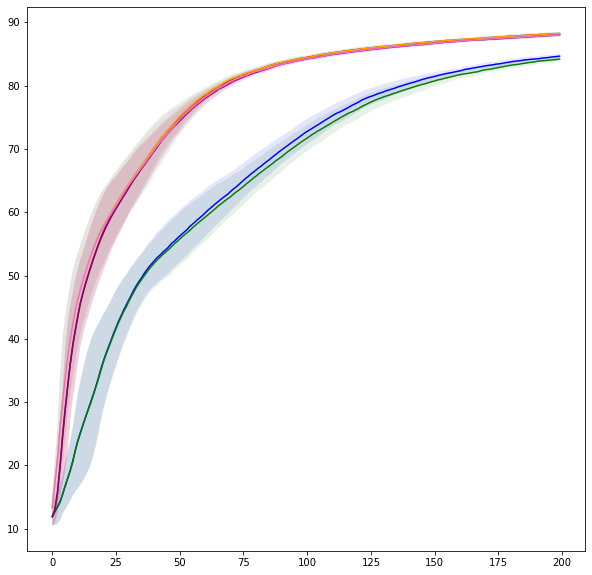

In [16]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
xval = np.arange(200)
l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_medium_fcn-lr_0.0001-l2Weight_0-seed_{i}-neuralBalance_0-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'blue', label='clean w/o full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='blue', alpha=.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_medium_fcn-lr_0.0001-l2Weight_0-seed_{i}-neuralBalance_0-neuralBalanceAtStart_1-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'cyan', label='clean w full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='cyan', alpha=.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_medium_fcn-lr_0.0001-l2Weight_0-seed_{i}-neuralBalance_1-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'red', label='NB w/o full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='red', alpha=.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_medium_fcn-lr_0.0001-l2Weight_0-seed_{i}-neuralBalance_1-neuralBalanceAtStart_1-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'orange', label='NB w full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='orange', alpha=.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_medium_fcn-lr_0.0001-l2Weight_0.01-seed_{i}-neuralBalance_0-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'green', label='L2 w/o full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='green', alpha=.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_medium_fcn-lr_0.0001-l2Weight_0.01-seed_{i}-neuralBalance_0-neuralBalanceAtStart_1-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'paleturquoise', label='L2 w full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='paleturquoise', alpha=.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_medium_fcn-lr_0.0001-l2Weight_0.01-seed_{i}-neuralBalance_1-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'purple', label='L2 + NB w/o full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='purple', alpha=.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_medium_fcn-lr_0.0001-l2Weight_0.01-seed_{i}-neuralBalance_1-neuralBalanceAtStart_1-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'hotpink', label='L2 + NB w full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='hotpink', alpha=.1)

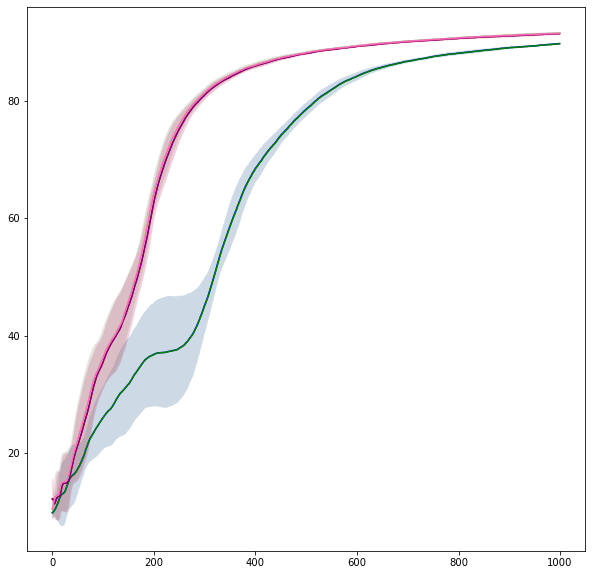

In [19]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
xval = np.arange(1000)
l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_large_fcn-lr_0.0001-l2Weight_0-seed_{i}-neuralBalance_0-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'blue', label='clean w/o full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='blue', alpha=.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_large_fcn-lr_0.0001-l2Weight_0-seed_{i}-neuralBalance_0-neuralBalanceAtStart_1-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'cyan', label='clean w full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='cyan', alpha=.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_large_fcn-lr_0.0001-l2Weight_0-seed_{i}-neuralBalance_1-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'red', label='NB w/o full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='red', alpha=.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_large_fcn-lr_0.0001-l2Weight_0-seed_{i}-neuralBalance_1-neuralBalanceAtStart_1-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'orange', label='NB w full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='orange', alpha=.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_large_fcn-lr_0.0001-l2Weight_0.0001-seed_{i}-neuralBalance_0-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'green', label='L2 w/o full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='green', alpha=.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_large_fcn-lr_0.0001-l2Weight_0.0001-seed_{i}-neuralBalance_0-neuralBalanceAtStart_1-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'paleturquoise', label='L2 w full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='paleturquoise', alpha=.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_large_fcn-lr_0.0001-l2Weight_0.0001-seed_{i}-neuralBalance_1-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'purple', label='L2 + NB w/o full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='purple', alpha=.1)

l = []
for i in range(101, 106):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_large_fcn-lr_0.0001-l2Weight_0.0001-seed_{i}-neuralBalance_1-neuralBalanceAtStart_1-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'hotpink', label='L2 + NB w full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='hotpink', alpha=.1)

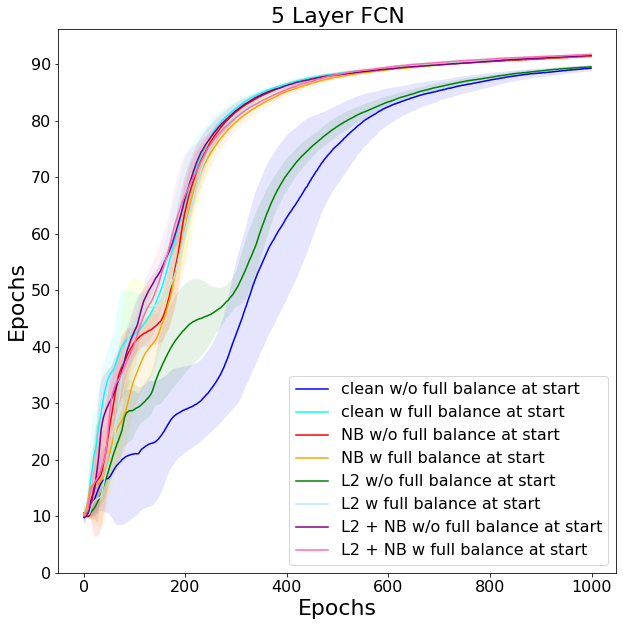

In [33]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
xval = np.arange(1000)
l = []
for i in range(25, 30):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_large_fcn-lr_0.0001-l2Weight_0-seed_{i}-neuralBalance_0-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'blue', label='clean w/o full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='blue', alpha=.1)

l = []
for i in range(116, 121):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_large_fcn-lr_0.0001-l2Weight_0-seed_{i}-neuralBalance_0-neuralBalanceAtStart_1-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'cyan', label='clean w full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='cyan', alpha=.1)

l = []
for i in range(20, 25):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_large_fcn-lr_0.0001-l2Weight_0-seed_{i}-neuralBalance_1-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'red', label='NB w/o full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='red', alpha=.1)

l = []
for i in range(111, 116):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_large_fcn-lr_0.0001-l2Weight_0-seed_{i}-neuralBalance_1-neuralBalanceAtStart_1-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'orange', label='NB w full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='orange', alpha=.1)

l = []
for i in range(15, 20):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_large_fcn-lr_0.0001-l2Weight_0.0001-seed_{i}-neuralBalance_0-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'green', label='L2 w/o full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='green', alpha=.1)

l = []
for i in range(106, 111):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_large_fcn-lr_0.0001-l2Weight_0.0001-seed_{i}-neuralBalance_0-neuralBalanceAtStart_1-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'paleturquoise', label='L2 w full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='yellow', alpha=.1)

l = []
for i in range(30, 35):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_large_fcn-lr_0.0001-l2Weight_0.0001-seed_{i}-neuralBalance_1-neuralBalanceAtStart_0-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'purple', label='L2 + NB w/o full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='purple', alpha=.1)

l = []
for i in range(121, 126):
    with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/hist/MNIST-model_large_fcn-lr_0.0001-l2Weight_0.0001-seed_{i}-neuralBalance_1-neuralBalanceAtStart_1-trainDataFrac_1.pkl', 'rb') as f:
        l.append(pickle.load(f)['test_acc'])
l = np.array(l)
mean = l.mean(axis=0)
std = l.std(axis=0)
plt.plot(xval, mean, 'hotpink', label='L2 + NB w full balance at start')
plt.fill_between(xval, mean-std, mean+std, facecolor='hotpink', alpha=.1)

plt.yticks(np.arange(0,100, 10))
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=16)
plt.xlabel('Epochs', fontsize = 22)
plt.ylabel('Epochs', fontsize = 22)
plt.title('5 Layer FCN', fontsize=22)

plt.legend(fontsize=16)

plt.savefig('large_fcn.pdf', dpi=1000)

In [53]:
from PyPDF2 import PdfReader, PdfWriter
input_pdf = PdfReader('/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/plots.pdf')
output_pdf = PdfWriter()

page = input_pdf.pages[0]

page.cropbox.lower_left = (80, 80)
page.cropbox.upper_right = (1050, 1050)

output_pdf.add_page(page)

with open('/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/outputPDFS/MnistComparison.pdf', 'wb') as output_file:
    output_pdf.write(output_file)

In [63]:
from PyPDF2 import PdfReader, PdfWriter
input_pdf = PdfReader('/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/large_fcn.pdf')
output_pdf = PdfWriter()

page = input_pdf.pages[0]

page.cropbox.lower_left = (35, 40)
page.cropbox.upper_right = (660, 660)

output_pdf.add_page(page)

with open('/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/outputPDFS/MnistLargeFCN.pdf', 'wb') as output_file:
    output_pdf.write(output_file)

In [88]:
from PyPDF2 import PdfReader, PdfWriter
input_pdf = PdfReader('/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/noBalanceVsFullBalance.pdf')
output_pdf = PdfWriter()

page = input_pdf.pages[0]

page.cropbox.lower_left = (125, 125)
page.cropbox.upper_right = (1325, 1300)

output_pdf.add_page(page)

with open('/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/outputPDFS/noBalanceVsFullBalance.pdf', 'wb') as output_file:
    output_pdf.write(output_file)

In [115]:
from PyPDF2 import PdfReader, PdfWriter
input_pdf = PdfReader('/baldig/proteomics2/ian/Neural-Balance/personalExps/transformer/transformer.pdf')
output_pdf = PdfWriter()

page = input_pdf.pages[0]

page.cropbox.lower_left = (20, 40)
page.cropbox.upper_right = (650, 660)

output_pdf.add_page(page)

with open('/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/outputPDFS/transformer.pdf', 'wb') as output_file:
    output_pdf.write(output_file)

In [116]:
from PyPDF2 import PdfReader, PdfWriter
input_pdf = PdfReader('/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/Rnn3Layers.pdf')
output_pdf = PdfWriter()

page = input_pdf.pages[0]

page.cropbox.lower_left = (110, 20)
page.cropbox.upper_right = (1300, 535)

output_pdf.add_page(page)

with open('/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/outputPDFS/Rnn3Layers.pdf', 'wb') as output_file:
    output_pdf.write(output_file)

In [158]:
from PyPDF2 import PdfReader, PdfWriter
input_pdf = PdfReader('/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/MnistFrac1e-2.pdf')
output_pdf = PdfWriter()

page = input_pdf.pages[0]

page.cropbox.lower_left = (80, 130)
page.cropbox.upper_right = (1000, 1300)

output_pdf.add_page(page)

with open('/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/outputPDFS/MnistFrac1e-2.pdf', 'wb') as output_file:
    output_pdf.write(output_file)

In [146]:
from PyPDF2 import PdfReader, PdfWriter
input_pdf = PdfReader('/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/rnnimdb3lay.pdf')
output_pdf = PdfWriter()

page = input_pdf.pages[0]

page.cropbox.lower_left = (20, 15)
page.cropbox.upper_right = (650, 470)

output_pdf.add_page(page)

with open('/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/outputPDFS/05IMDBRNN.pdf', 'wb') as output_file:
    output_pdf.write(output_file)

In [154]:
from PyPDF2 import PdfReader, PdfWriter
input_pdf = PdfReader('/baldig/proteomics2/ian/Neural-Balance/toyFullBalanceEveryEpoch.pdf')
output_pdf = PdfWriter()

page = input_pdf.pages[0]

page.cropbox.lower_left = (30, 25)
page.cropbox.upper_right = (650, 530)

output_pdf.add_page(page)

with open('/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/outputPDFS/toyFullBalanceEveryEpoch.pdf', 'wb') as output_file:
    output_pdf.write(output_file)

In [155]:
from PyPDF2 import PdfReader, PdfWriter
input_pdf = PdfReader('/baldig/proteomics2/ian/Neural-Balance/toySemiBalanceEveryEpoch.pdf')
output_pdf = PdfWriter()

page = input_pdf.pages[0]

page.cropbox.lower_left = (30, 25)
page.cropbox.upper_right = (650, 530)

output_pdf.add_page(page)

with open('/baldig/proteomics2/ian/Neural-Balance/personalExps/MnistFC/outputPDFS/toySemiBalanceEveryEpoch.pdf', 'wb') as output_file:
    output_pdf.write(output_file)